In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load your dataset
df = pd.read_csv("reduced_josaa2024.csv")  

# Convert rank columns to numeric (if not already)
df['Opening Rank'] = pd.to_numeric(df['Opening Rank'], errors='coerce')
df['Closing Rank'] = pd.to_numeric(df['Closing Rank'], errors='coerce')

df.dropna(subset=['Opening Rank', 'Closing Rank'], inplace=True)

# Check basic information
print(df.info())
print(df.dtypes)
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 10136 entries, 0 to 10359
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Institute              10136 non-null  object 
 1   Academic Program Name  10136 non-null  object 
 2   Quota                  10136 non-null  object 
 3   Seat Type              10136 non-null  object 
 4   Gender                 10136 non-null  object 
 5   Opening Rank           10136 non-null  float64
 6   Closing Rank           10136 non-null  float64
dtypes: float64(2), object(5)
memory usage: 633.5+ KB
None
Institute                 object
Academic Program Name     object
Quota                     object
Seat Type                 object
Gender                    object
Opening Rank             float64
Closing Rank             float64
dtype: object
                                           Institute  \
0  Atal Bihari Vajpayee Indian Institute of Infor...   
1  Atal Bihar

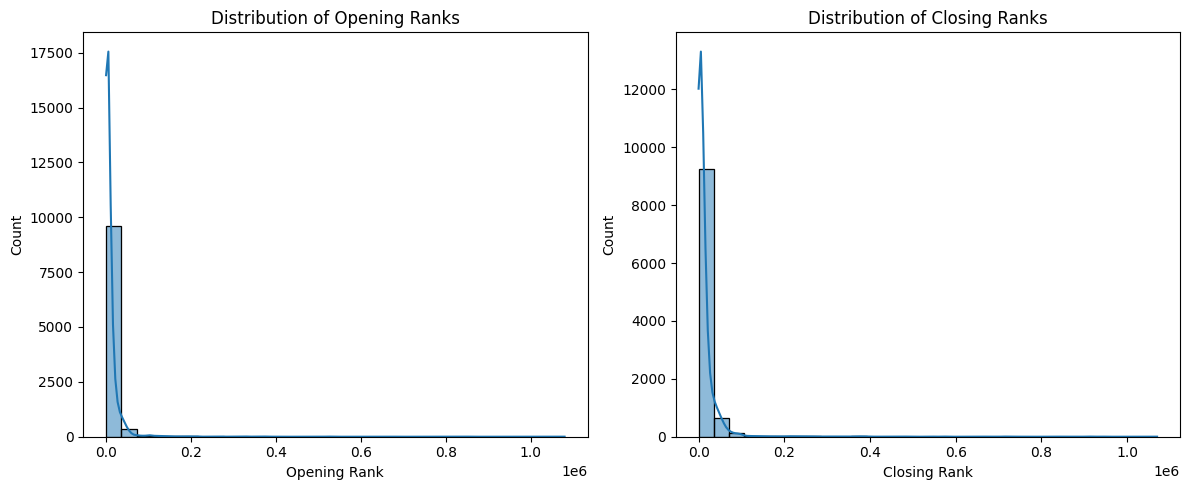

In [12]:
# Distribution of Opening and Closing Ranks
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Opening Rank'], bins=30, kde=True)
plt.title('Distribution of Opening Ranks')

plt.subplot(1, 2, 2)
sns.histplot(df['Closing Rank'], bins=30, kde=True)
plt.title('Distribution of Closing Ranks')
plt.tight_layout()
plt.show()

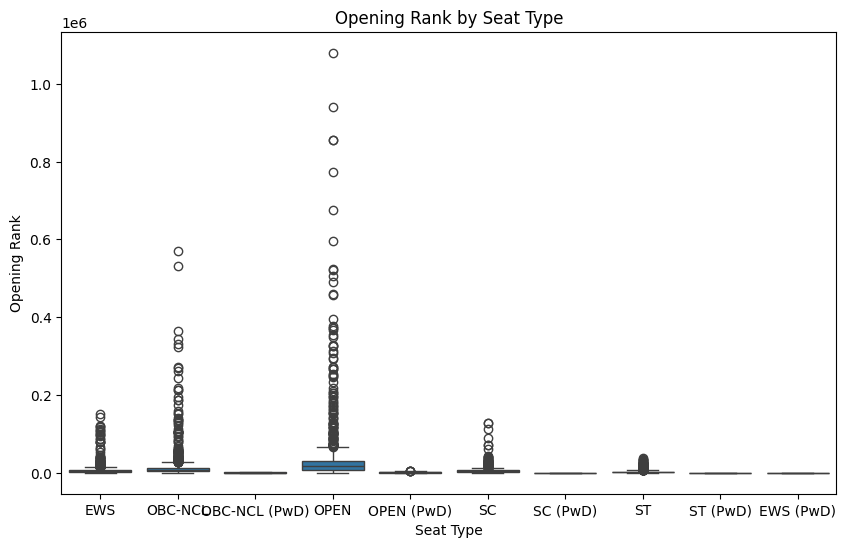

In [13]:
# Boxplot to check differences by Seat Type
plt.figure(figsize=(10, 6))
sns.boxplot(x="Seat Type", y="Opening Rank", data=df)
plt.title("Opening Rank by Seat Type")
plt.show()

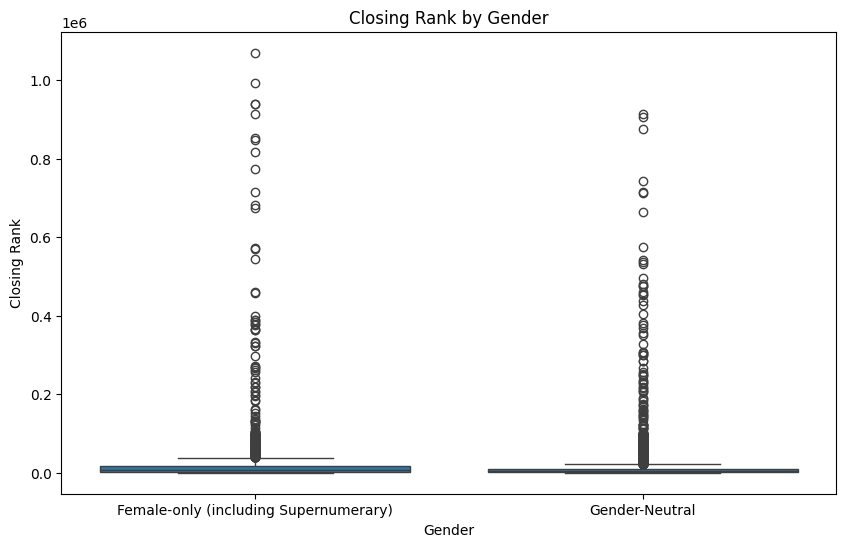

In [14]:
# Boxplot to check differences by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x="Gender", y="Closing Rank", data=df)
plt.title("Closing Rank by Gender")
plt.show()

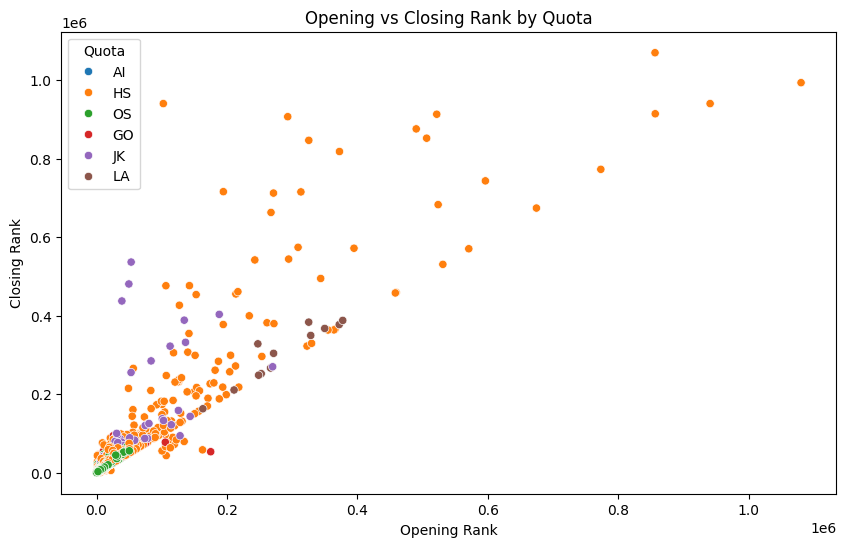

In [15]:
# Scatter plot to see the relationship between Opening and Closing Rank by Quota
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Opening Rank", y="Closing Rank", hue="Quota", data=df)
plt.title("Opening vs Closing Rank by Quota")
plt.show()

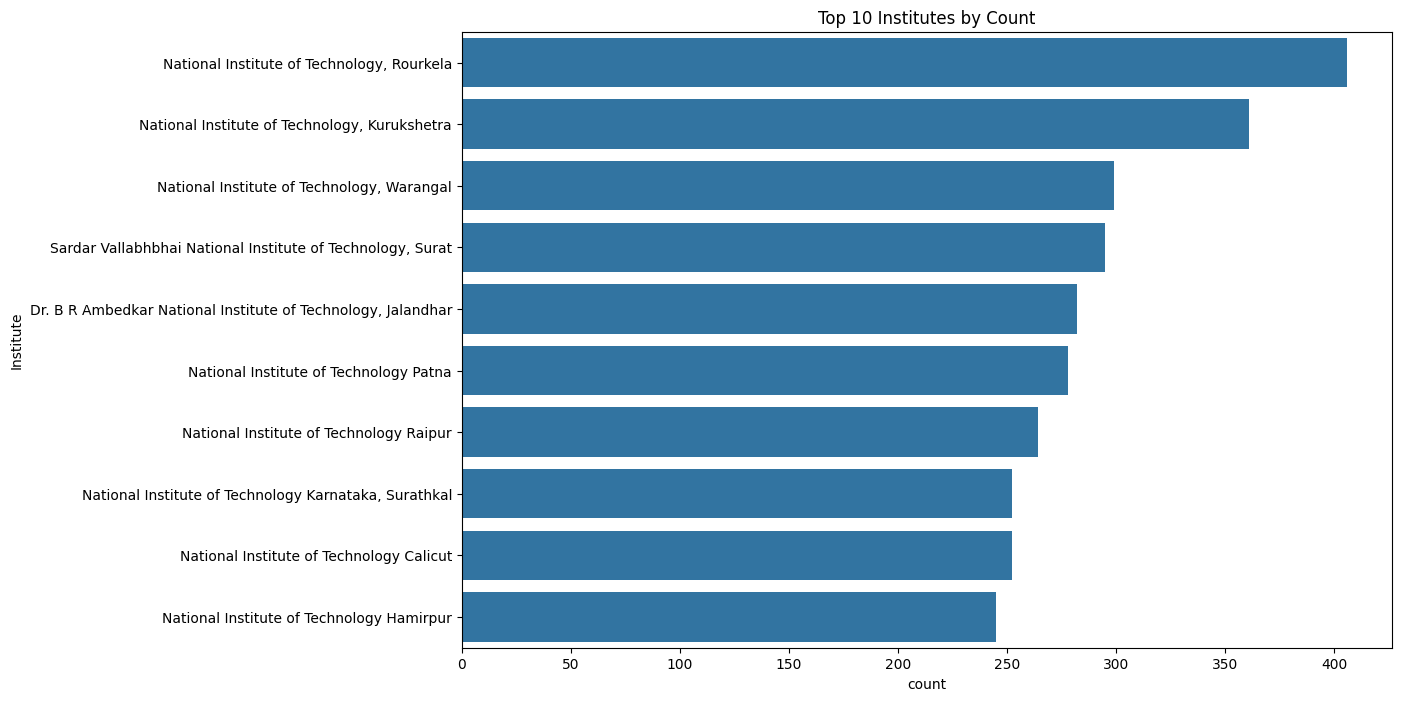

In [16]:
# Countplot of Programs/Colleges (if dataset is large, we can sample or focus on top ones)
plt.figure(figsize=(12, 8))
top_institutes = df['Institute'].value_counts().nlargest(10).index
sns.countplot(y="Institute", data=df[df['Institute'].isin(top_institutes)], order=top_institutes)
plt.title("Top 10 Institutes by Count")
plt.show()

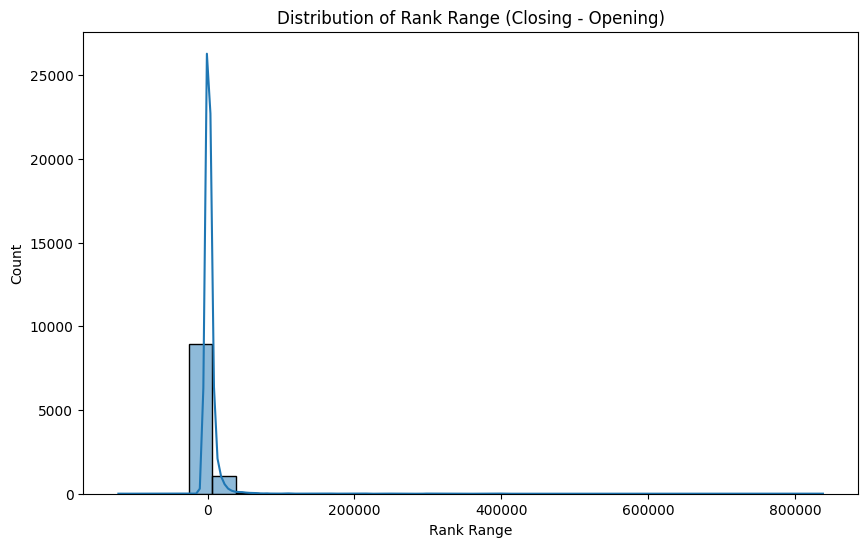

In [17]:
# Visualize rank range (difference between closing and opening rank) distribution
df['Rank Range'] = df['Closing Rank'] - df['Opening Rank']
plt.figure(figsize=(10, 6))
sns.histplot(df['Rank Range'], bins=30, kde=True)
plt.title("Distribution of Rank Range (Closing - Opening)")
plt.show()


=== Basic Dataset Information ===
Total number of records: 10136

Columns in dataset: ['Institute', 'Academic Program Name', 'Quota', 'Seat Type', 'Gender', 'Opening Rank', 'Closing Rank']

=== Institute and Program Analysis ===

Number of unique institutes: 81
Number of unique programs: 200

Top 5 institutes by number of seats:
Institute
National Institute of Technology, Rourkela                      406
National Institute of Technology, Kurukshetra                   361
National Institute of Technology, Warangal                      299
Sardar Vallabhbhai National Institute of Technology, Surat      295
Dr. B R Ambedkar National Institute of Technology, Jalandhar    282
Name: count, dtype: int64

Top 5 programs by number of seats:
Academic Program Name
Computer Science and Engineering (4 Years, Bachelor of Technology)             1350
Electronics and Communication Engineering (4 Years, Bachelor of Technology)     956
Mechanical Engineering (4 Years, Bachelor of Technology)          

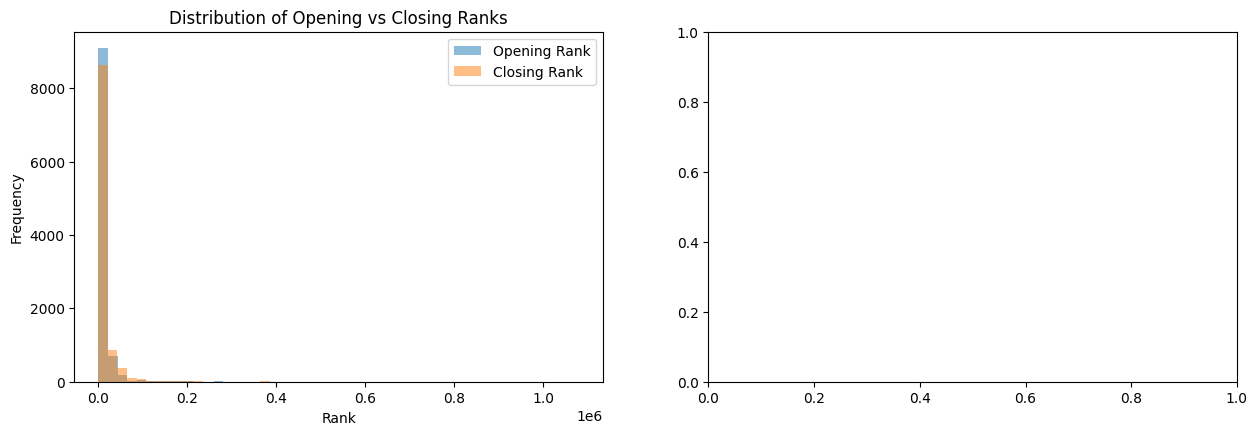

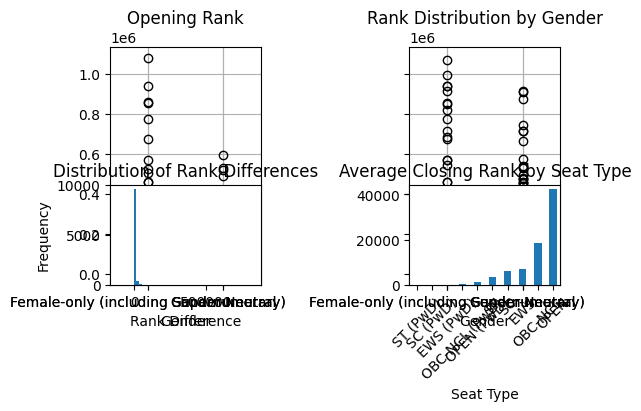

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

def analyze_admissions_data(df):
    """
    Comprehensive analysis of college admissions data
    """
    analysis_results = {}
    
    # 1. Basic Statistics
    print("\n=== Basic Dataset Information ===")
    print(f"Total number of records: {len(df)}")
    print("\nColumns in dataset:", df.columns.tolist())
    
    # 2. Analyze institutes and programs
    print("\n=== Institute and Program Analysis ===")
    institute_counts = df['Institute'].value_counts()
    program_counts = df['Academic Program Name'].value_counts()
    
    print(f"\nNumber of unique institutes: {len(institute_counts)}")
    print(f"Number of unique programs: {len(program_counts)}")
    print("\nTop 5 institutes by number of seats:")
    print(institute_counts.head())
    print("\nTop 5 programs by number of seats:")
    print(program_counts.head())
    
    # 3. Quota and Seat Type Analysis
    print("\n=== Quota and Seat Type Analysis ===")
    quota_distribution = df['Quota'].value_counts()
    seat_type_distribution = df['Seat Type'].value_counts()
    
    print("\nQuota Distribution:")
    print(quota_distribution)
    print("\nSeat Type Distribution:")
    print(seat_type_distribution)
    
    # 4. Gender Analysis
    print("\n=== Gender Distribution Analysis ===")
    gender_distribution = df['Gender'].value_counts()
    print(gender_distribution)
    
    # 5. Rank Analysis
    print("\n=== Rank Analysis ===")
    rank_stats = df[['Opening Rank', 'Closing Rank']].describe()
    print("\nRank Statistics:")
    print(rank_stats)
    
    # Calculate rank difference (competition intensity)
    df['Rank_Difference'] = df['Closing Rank'] - df['Opening Rank']
    print("\nRank Difference Statistics:")
    print(df['Rank_Difference'].describe())
    
    # 6. Top Programs by Lowest Closing Rank (Most Competitive)
    print("\n=== Most Competitive Programs ===")
    most_competitive = df.nsmallest(5, 'Closing Rank')[['Institute', 'Academic Program Name', 'Opening Rank', 'Closing Rank']]
    print("\nTop 5 Most Competitive Programs (Lowest Closing Ranks):")
    print(most_competitive)
    
    # 7. Programs with Highest Competition (Largest Rank Difference)
    high_competition = df.nlargest(5, 'Rank_Difference')[
        ['Institute', 'Academic Program Name', 'Opening Rank', 'Closing Rank', 'Rank_Difference']
    ]
    print("\n=== Programs with Highest Competition ===")
    print(high_competition)
    
    # 8. Generate visualizations
    plt.figure(figsize=(15, 10))
    
    # Plot 1: Distribution of Opening vs Closing Ranks
    plt.subplot(2, 2, 1)
    plt.hist(df['Opening Rank'], bins=50, alpha=0.5, label='Opening Rank')
    plt.hist(df['Closing Rank'], bins=50, alpha=0.5, label='Closing Rank')
    plt.legend()
    plt.title('Distribution of Opening vs Closing Ranks')
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    
    # Plot 2: Box Plot of Ranks by Gender
    plt.subplot(2, 2, 2)
    df.boxplot(column=['Opening Rank', 'Closing Rank'], by='Gender')
    plt.title('Rank Distribution by Gender')
    plt.suptitle('')  # This removes the automatic suptitle
    
    # Plot 3: Rank Difference Distribution
    plt.subplot(2, 2, 3)
    plt.hist(df['Rank_Difference'], bins=50)
    plt.title('Distribution of Rank Differences')
    plt.xlabel('Rank Difference')
    plt.ylabel('Frequency')
    
    # Plot 4: Average Closing Rank by Seat Type
    plt.subplot(2, 2, 4)
    seat_type_avg = df.groupby('Seat Type')['Closing Rank'].mean().sort_values()
    seat_type_avg.plot(kind='bar')
    plt.title('Average Closing Rank by Seat Type')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    return analysis_results

# Execute the analysis
analysis_results = analyze_admissions_data(df)

# Print the analysis results
for key, value in analysis_results.items():
    print(f"{key}: {value}")

=== ML Preprocessing Analysis ===

1. Missing Values Analysis:
Series([], dtype: int64)

2. Categorical Variables Analysis:

Institute:
Number of unique values: 81
Cardinality ratio: 0.0080

Value Counts:
Institute
National Institute of Technology, Rourkela                      406
National Institute of Technology, Kurukshetra                   361
National Institute of Technology, Warangal                      299
Sardar Vallabhbhai National Institute of Technology, Surat      295
Dr. B R Ambedkar National Institute of Technology, Jalandhar    282
Name: count, dtype: int64

Academic Program Name:
Number of unique values: 200
Cardinality ratio: 0.0197

Value Counts:
Academic Program Name
Computer Science and Engineering (4 Years, Bachelor of Technology)             1350
Electronics and Communication Engineering (4 Years, Bachelor of Technology)     956
Mechanical Engineering (4 Years, Bachelor of Technology)                        931
Civil Engineering (4 Years, Bachelor of Technology)

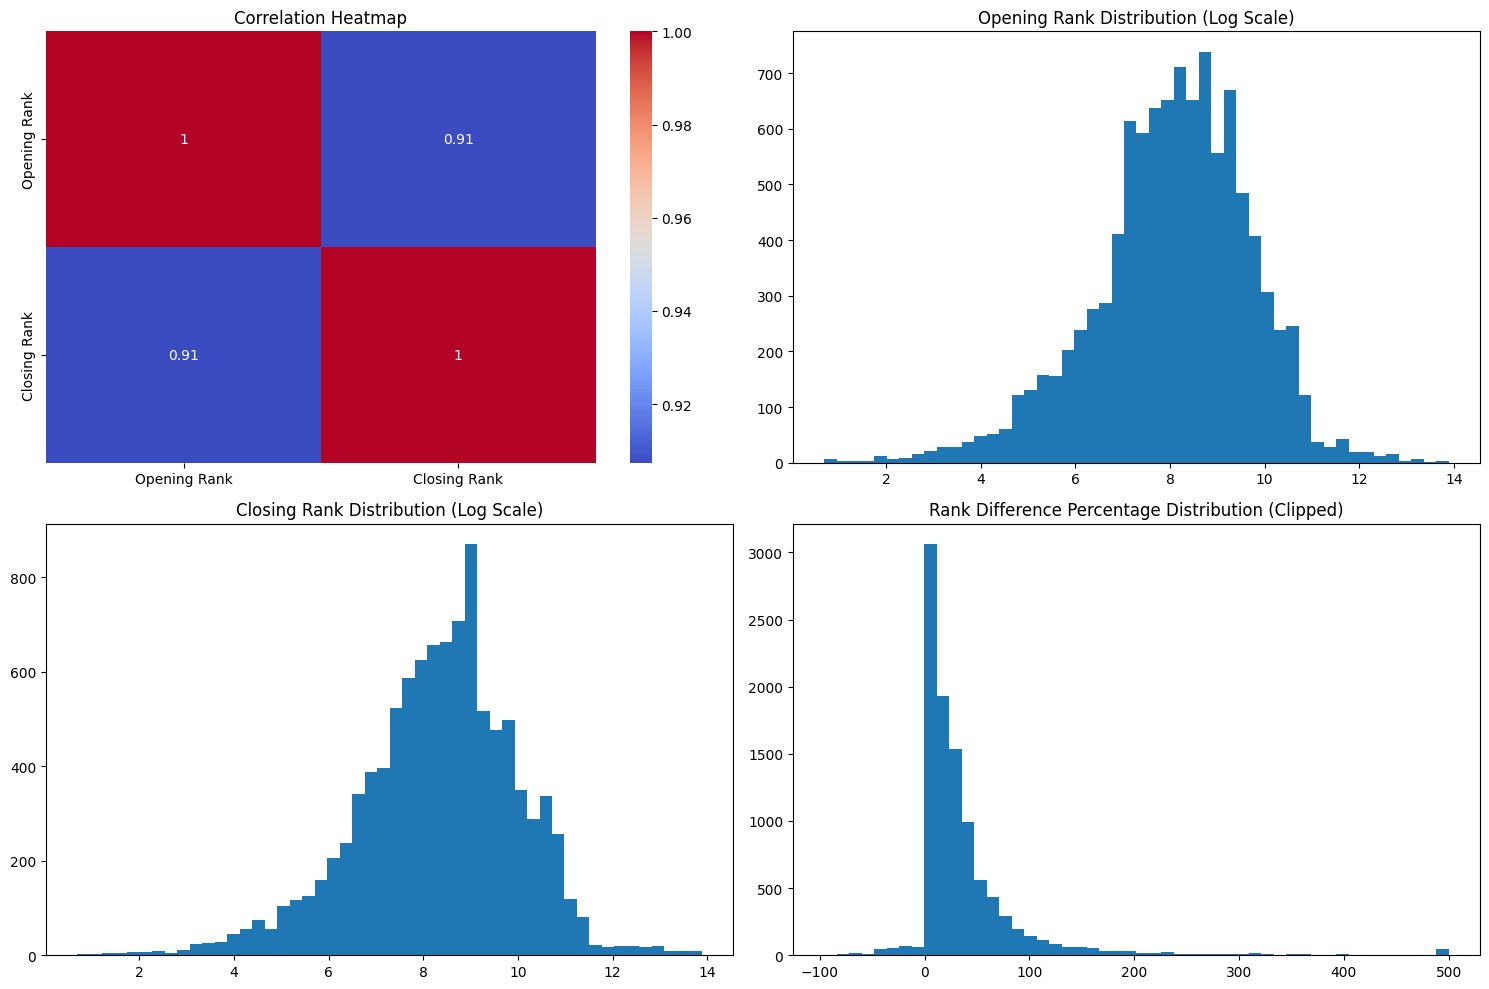


6. Label Encoding Preview (First 5 rows):
                                           Institute  \
0  Atal Bihari Vajpayee Indian Institute of Infor...   
1  Atal Bihari Vajpayee Indian Institute of Infor...   
2  Atal Bihari Vajpayee Indian Institute of Infor...   
3  Atal Bihari Vajpayee Indian Institute of Infor...   
4  Atal Bihari Vajpayee Indian Institute of Infor...   

                               Academic Program Name Quota      Seat Type  \
0  Computer Science and Engineering (4 Years, Bac...    AI            EWS   
1  Computer Science and Engineering (4 Years, Bac...    AI            EWS   
2  Computer Science and Engineering (4 Years, Bac...    AI        OBC-NCL   
3  Computer Science and Engineering (4 Years, Bac...    AI        OBC-NCL   
4  Computer Science and Engineering (4 Years, Bac...    AI  OBC-NCL (PwD)   

                                  Gender  Institute_encoded  \
0  Female-only (including Supernumerary)                  0   
1                         Gende

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

def analyze_for_ml_preprocessing(df):
    """
    Detailed analysis focusing on ML preprocessing requirements
    """
    print("=== ML Preprocessing Analysis ===")
    
    # 1. Check for missing values
    print("\n1. Missing Values Analysis:")
    missing_vals = df.isnull().sum()
    print(missing_vals[missing_vals > 0])
    
    # 2. Categorical Variables Analysis
    print("\n2. Categorical Variables Analysis:")
    categorical_cols = df.select_dtypes(include=['object']).columns
    
    for col in categorical_cols:
        unique_vals = df[col].nunique()
        print(f"\n{col}:")
        print(f"Number of unique values: {unique_vals}")
        print(f"Cardinality ratio: {unique_vals/len(df):.4f}")
        print("\nValue Counts:")
        print(df[col].value_counts().head())
        
    # 3. Numerical Variables Analysis
    print("\n3. Numerical Variables Analysis:")
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    
    print("\nSkewness:")
    print(df[numerical_cols].skew())
    
    print("\nKurtosis:")
    print(df[numerical_cols].kurtosis())
    
    # 4. Correlation Analysis
    print("\n4. Correlation between Opening and Closing Ranks:")
    correlation = df[['Opening Rank', 'Closing Rank']].corr()
    print(correlation)
    
    # 5. Feature Engineering Possibilities
    print("\n5. Feature Engineering Preview:")
    
    # Calculate rank difference percentage
    df['Rank_Difference_Percentage'] = ((df['Closing Rank'] - df['Opening Rank']) / df['Opening Rank']) * 100
    
    print("\nRank Difference Percentage Statistics:")
    print(df['Rank_Difference_Percentage'].describe())
    
    # 6. Visualizations for ML preprocessing
    plt.figure(figsize=(15, 10))
    
    # Plot 1: Correlation Heatmap
    plt.subplot(2, 2, 1)
    sns.heatmap(correlation, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    
    # Plot 2: Opening Rank Distribution (log scale)
    plt.subplot(2, 2, 2)
    plt.hist(np.log1p(df['Opening Rank']), bins=50)
    plt.title('Opening Rank Distribution (Log Scale)')
    
    # Plot 3: Closing Rank Distribution (log scale)
    plt.subplot(2, 2, 3)
    plt.hist(np.log1p(df['Closing Rank']), bins=50)
    plt.title('Closing Rank Distribution (Log Scale)')
    
    # Plot 4: Rank Difference Percentage Distribution
    plt.subplot(2, 2, 4)
    plt.hist(df['Rank_Difference_Percentage'].clip(-100, 500), bins=50)
    plt.title('Rank Difference Percentage Distribution (Clipped)')
    
    plt.tight_layout()
    plt.show()
    
    # 7. Categorical Encoding Preview
    print("\n6. Label Encoding Preview (First 5 rows):")
    le = LabelEncoder()
    encoded_df = df.copy()
    
    for col in categorical_cols:
        encoded_df[f'{col}_encoded'] = le.fit_transform(df[col])
    
    print(encoded_df[[*categorical_cols, *[f'{col}_encoded' for col in categorical_cols]]].head())
    
    return df

# Execute the analysis
df_with_features = analyze_for_ml_preprocessing(df)